<a href="https://colab.research.google.com/github/SivaranjanVithushan/Banglore_Home_Price_Prediction/blob/master/A_L_Stream_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from scipy.stats import mode

In [306]:
# Load the dataset
file_path = '/Thurka_Research.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
df = df.drop(columns=['Name'])
df = df.drop(columns=['Contact Email'])
df = df.drop(columns=['Experience'])
# Display the cleaned column names to verify
print("Cleaned Column Names:")
print(df.columns)

# Display the first few rows of the dataset
print("\nInitial Dataset:")
df.head(5)

Cleaned Column Names:
Index(['Streams', 'Career_Influence', 'Start_Time', 'Motivations',
       'Challenges', 'Skills', 'Occupation'],
      dtype='object')

Initial Dataset:


,Streams,Career_Influence,Start_Time,Motivations,Challenges,Skills,Occupation
0,Biology Stream,No,More than 2 years later,Personal Growth and Development,No,Technical Skill,Technology and Digital services
1,Arts Stream,Yes,Within 1 year,Family/Friends Support,No,"Arts skills (Dancing,Singing,Drawing,...)","Professional Services(Accounting,legal.consult..."
2,Technology Stream,no,More than 2 years later,Financial goals,yes,Technical Skill,Technology and Digital services
3,Biology Stream,No,Within 1-2 years,Family/Friends Support,No,Critical thinking,Technology and Digital services
4,Maths Stream,No,Immediately,Financial goals,Yes,Marketing,Retail and Sales


# **Data Analysis**

In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-308-6cf8856a4858>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skills', data=skills_count, palette='viridis', ax=axs[0, 0])
<ipython-input-308-6cf8856a4858>:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


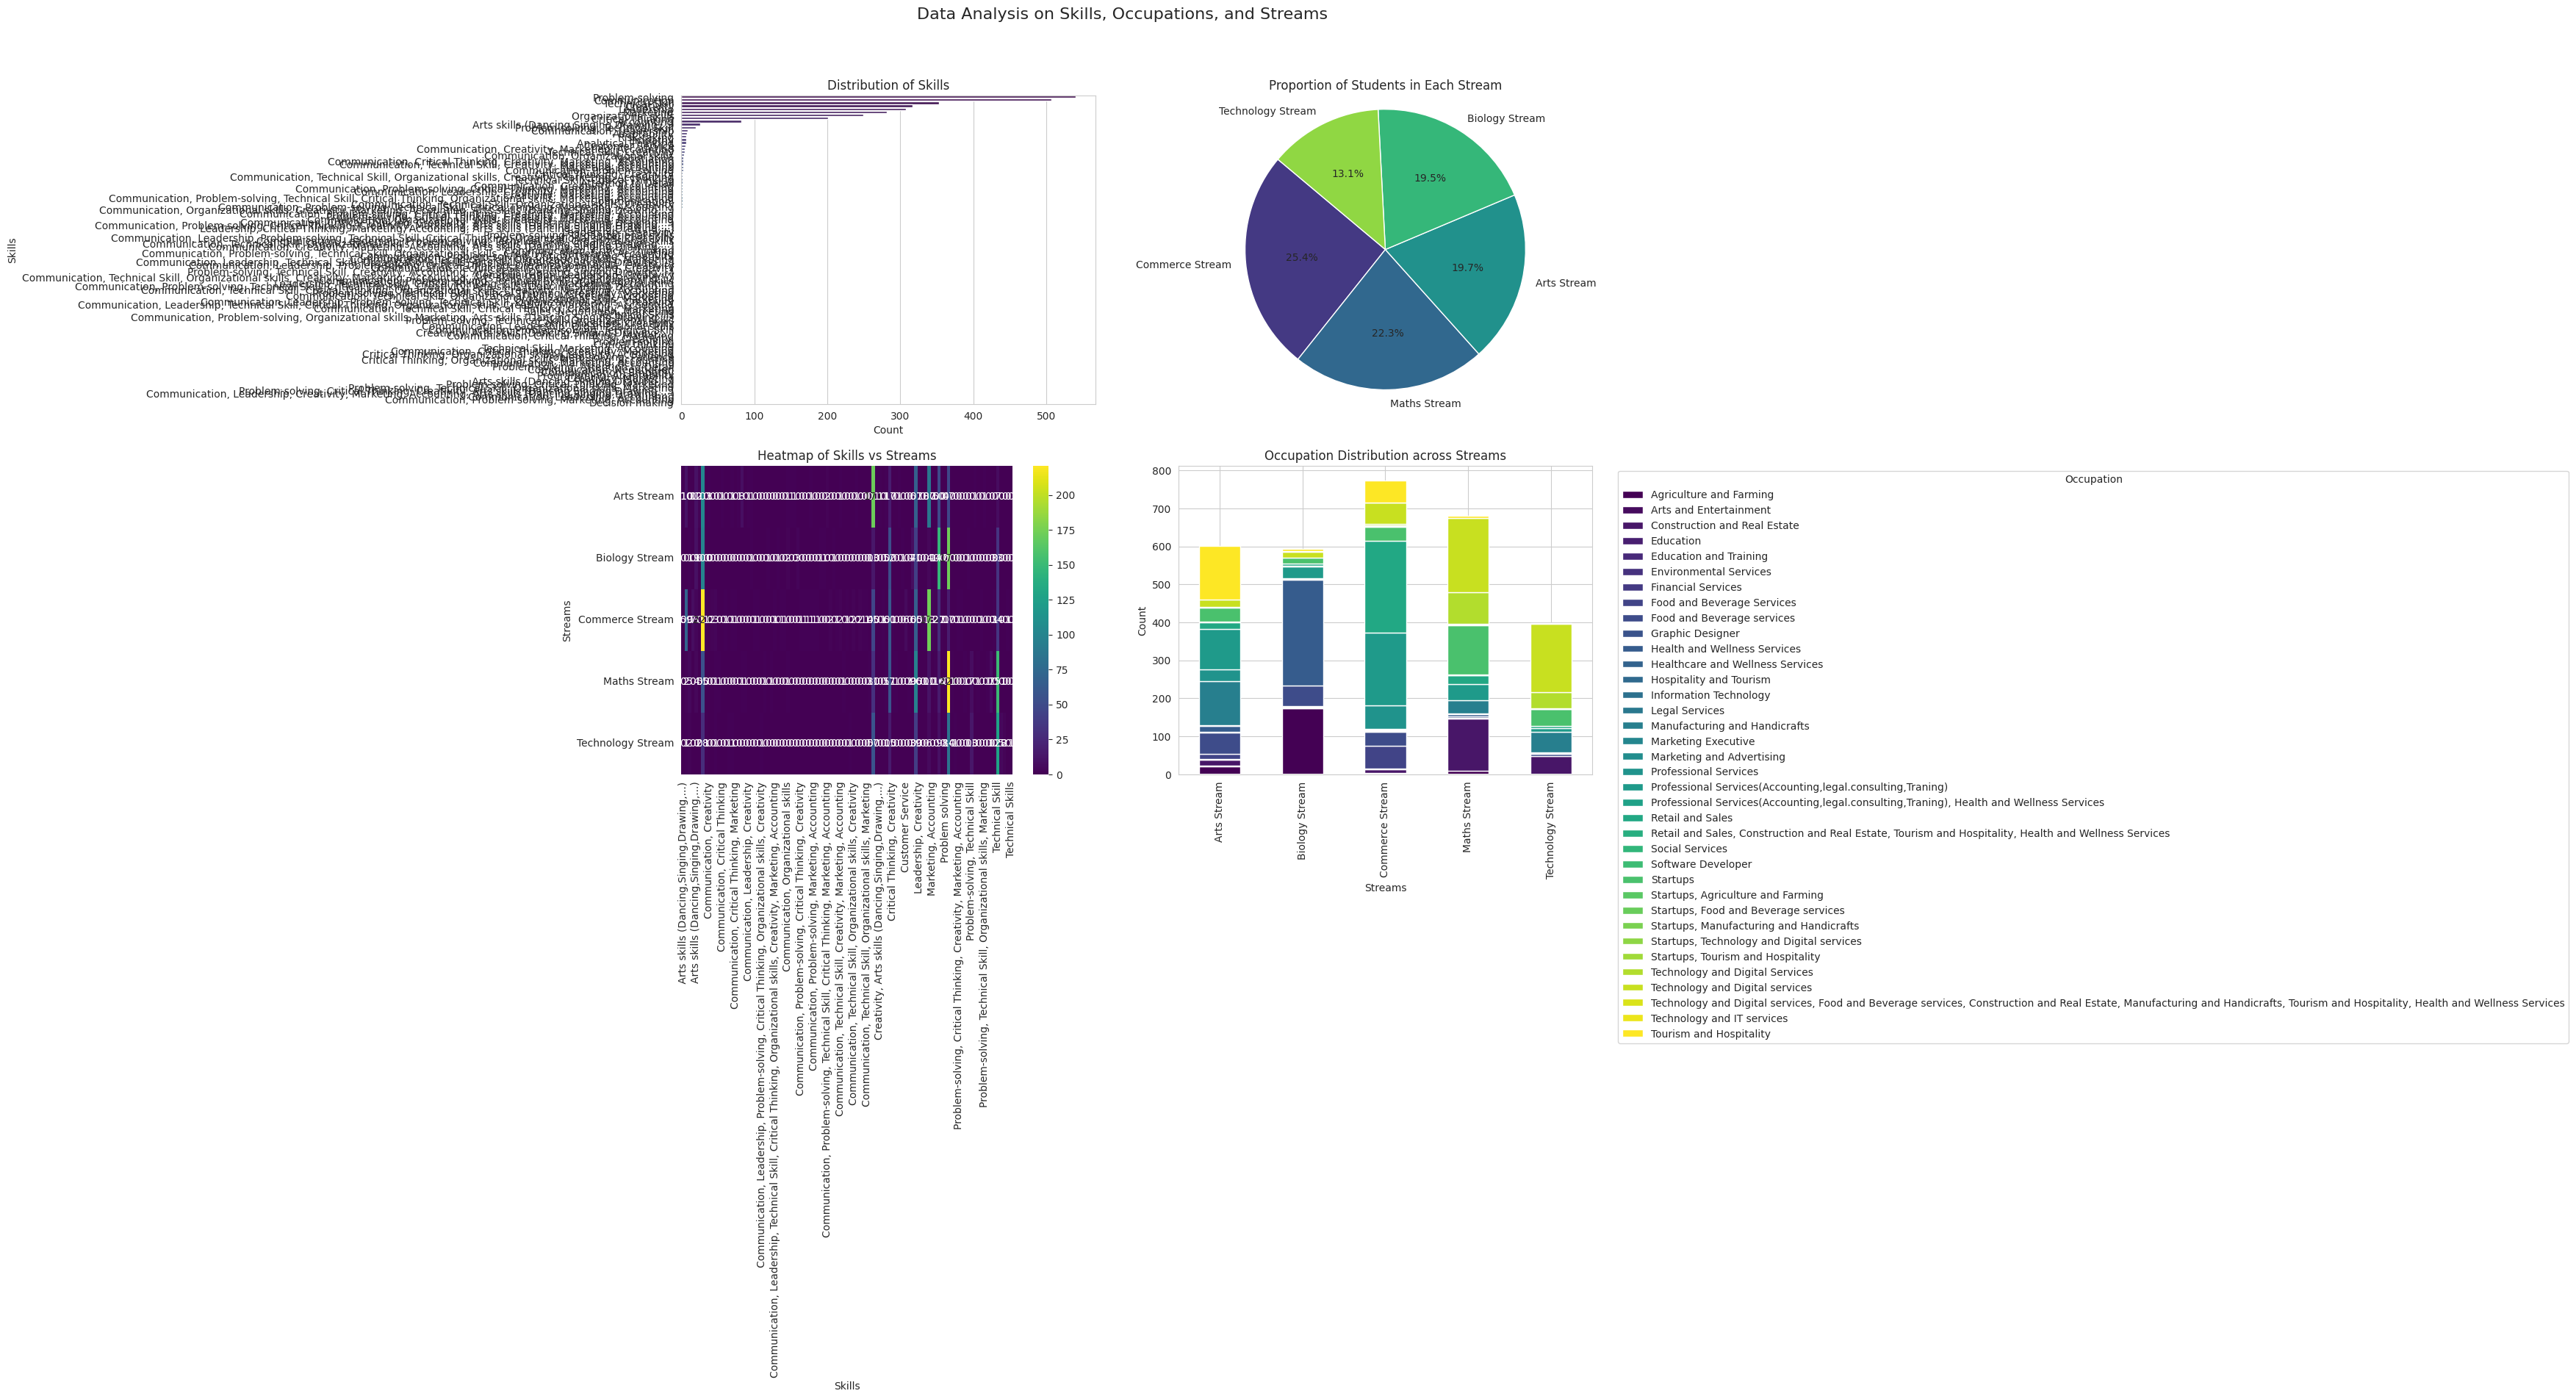

In [308]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Data Analysis on Skills, Occupations, and Streams', fontsize=16)

# Bar Plot for Skills Distribution
skills_count = df['Skills'].value_counts().reset_index()
skills_count.columns = ['Skills', 'Count']
sns.barplot(x='Count', y='Skills', data=skills_count, palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Skills')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Skills')

# Pie Chart for Streams Distribution
streams_count = df['Streams'].value_counts()
axs[0, 1].pie(streams_count, labels=streams_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(streams_count)))
axs[0, 1].set_title('Proportion of Students in Each Stream')
axs[0, 1].axis('equal')

# Heatmap for Correlation between Skills and Streams
skills_streams = df.groupby(['Streams', 'Skills']).size().unstack(fill_value=0)
sns.heatmap(skills_streams, annot=True, fmt='d', cmap='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Heatmap of Skills vs Streams')
axs[1, 0].set_xlabel('Skills')
axs[1, 0].set_ylabel('Streams')

# Stacked Bar Plot for Occupation vs Streams
occupation_streams = df.groupby(['Streams', 'Occupation']).size().unstack(fill_value=0)
occupation_streams.plot(kind='bar', stacked=True, colormap='viridis', ax=axs[1, 1])
axs[1, 1].set_title('Occupation Distribution across Streams')
axs[1, 1].set_xlabel('Streams')
axs[1, 1].set_ylabel('Count')
axs[1, 1].legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Skills Distribution by Streams:**


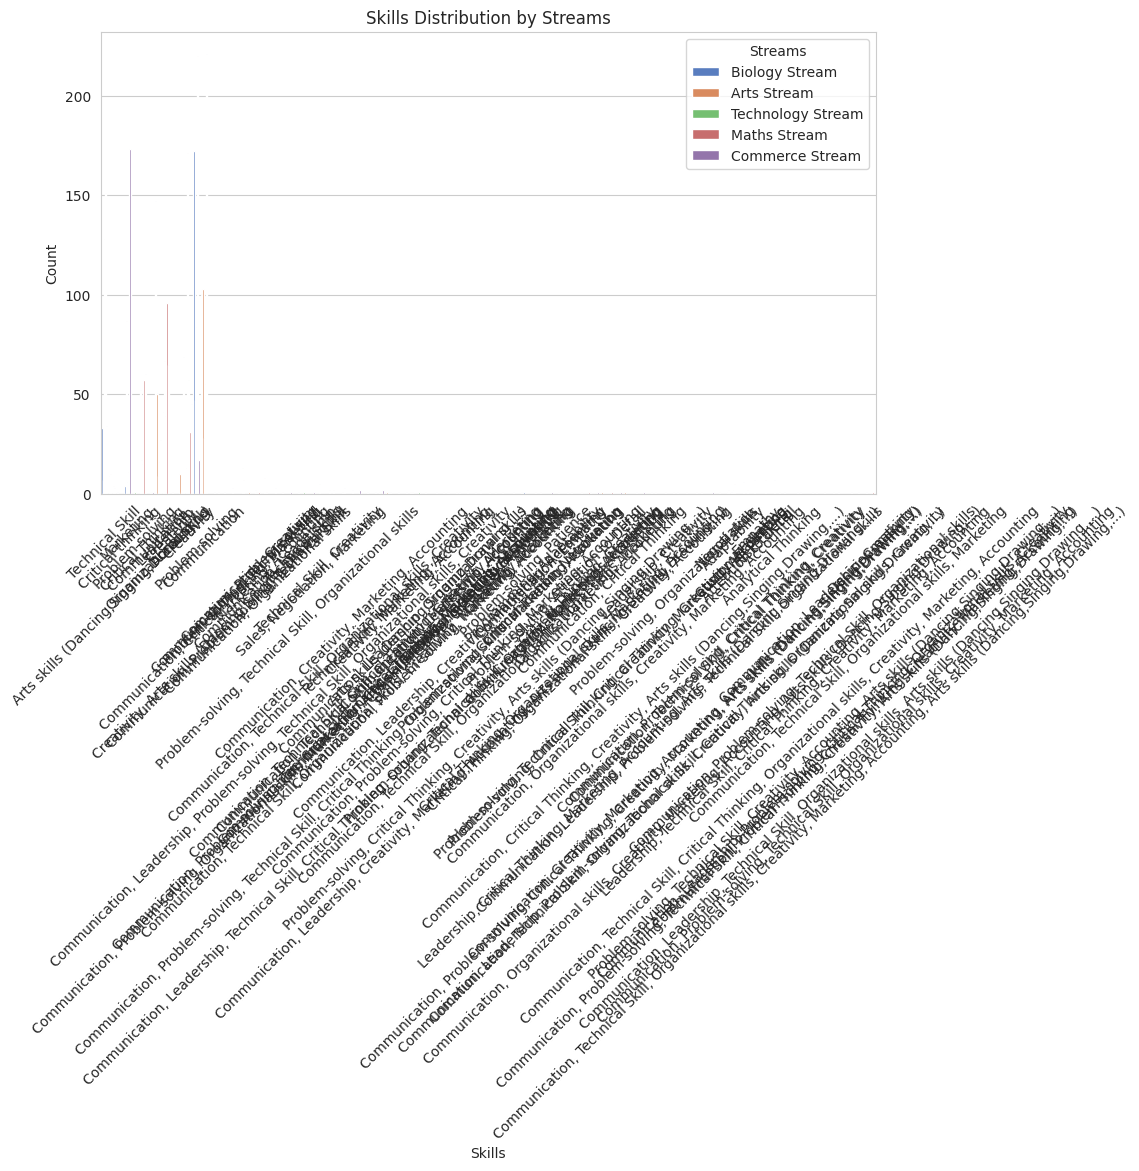

In [309]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Skills', data=df, hue='Streams', palette='muted')
plt.title('Skills Distribution by Streams')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Streams')
plt.show()


# **Occupation Distribution by Streams:**

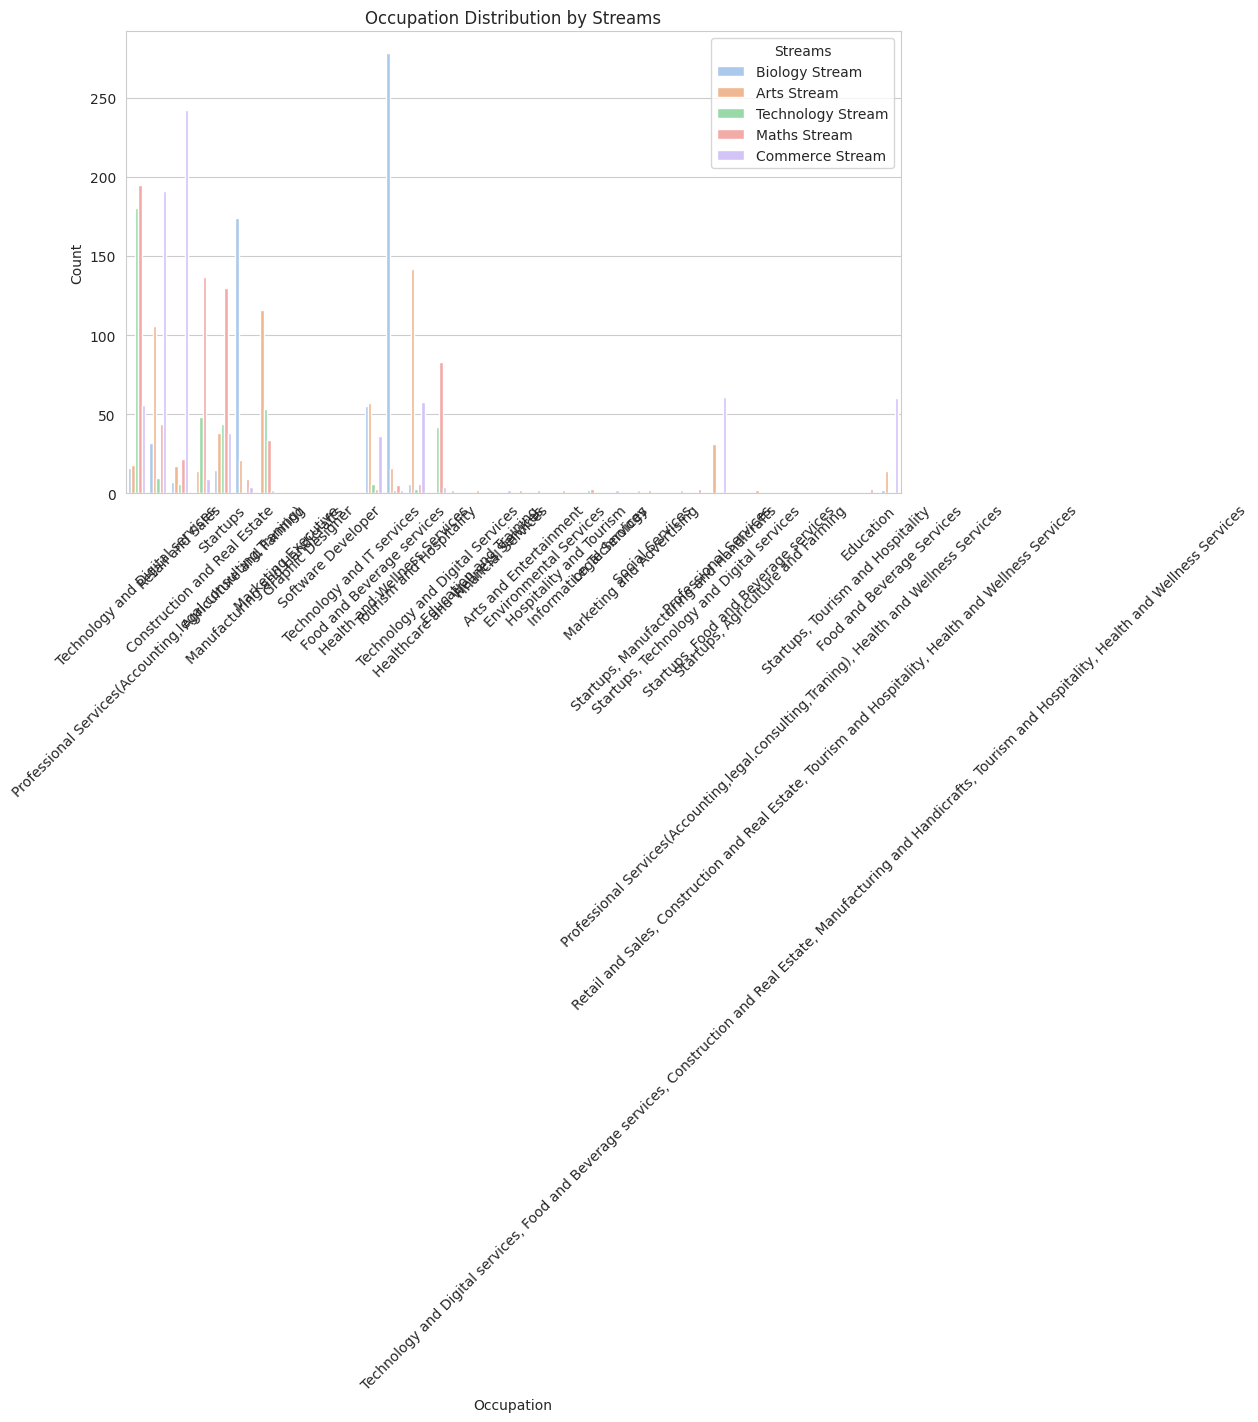

In [310]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df, hue='Streams', palette='pastel')
plt.title('Occupation Distribution by Streams')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Streams')
plt.show()


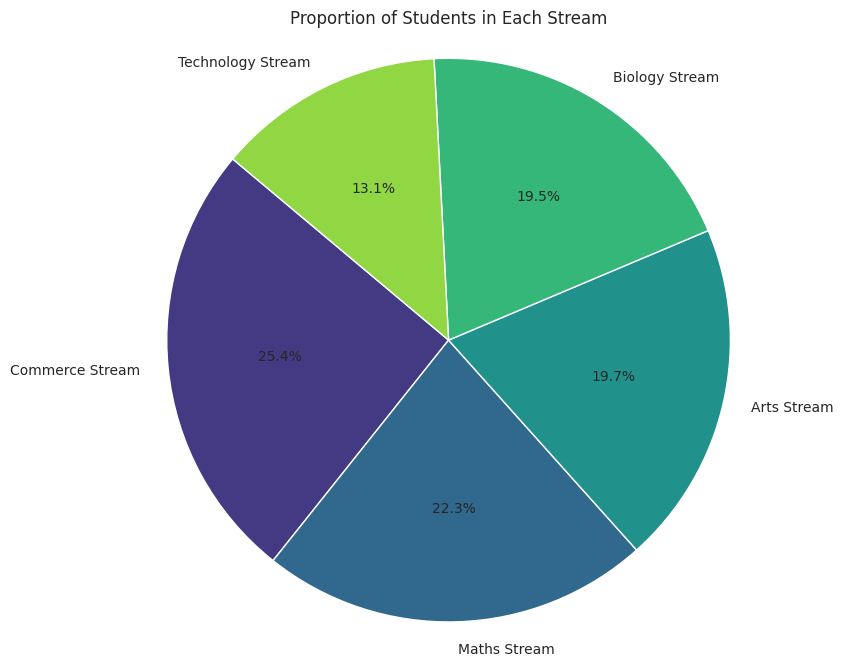

In [311]:
# Pie Chart for Streams Distribution
plt.figure(figsize=(8, 8))
streams_count = df['Streams'].value_counts()
plt.pie(streams_count, labels=streams_count.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(streams_count)))
plt.title('Proportion of Students in Each Stream')
plt.axis('equal')
plt.show()

<Figure size 1400x700 with 0 Axes>

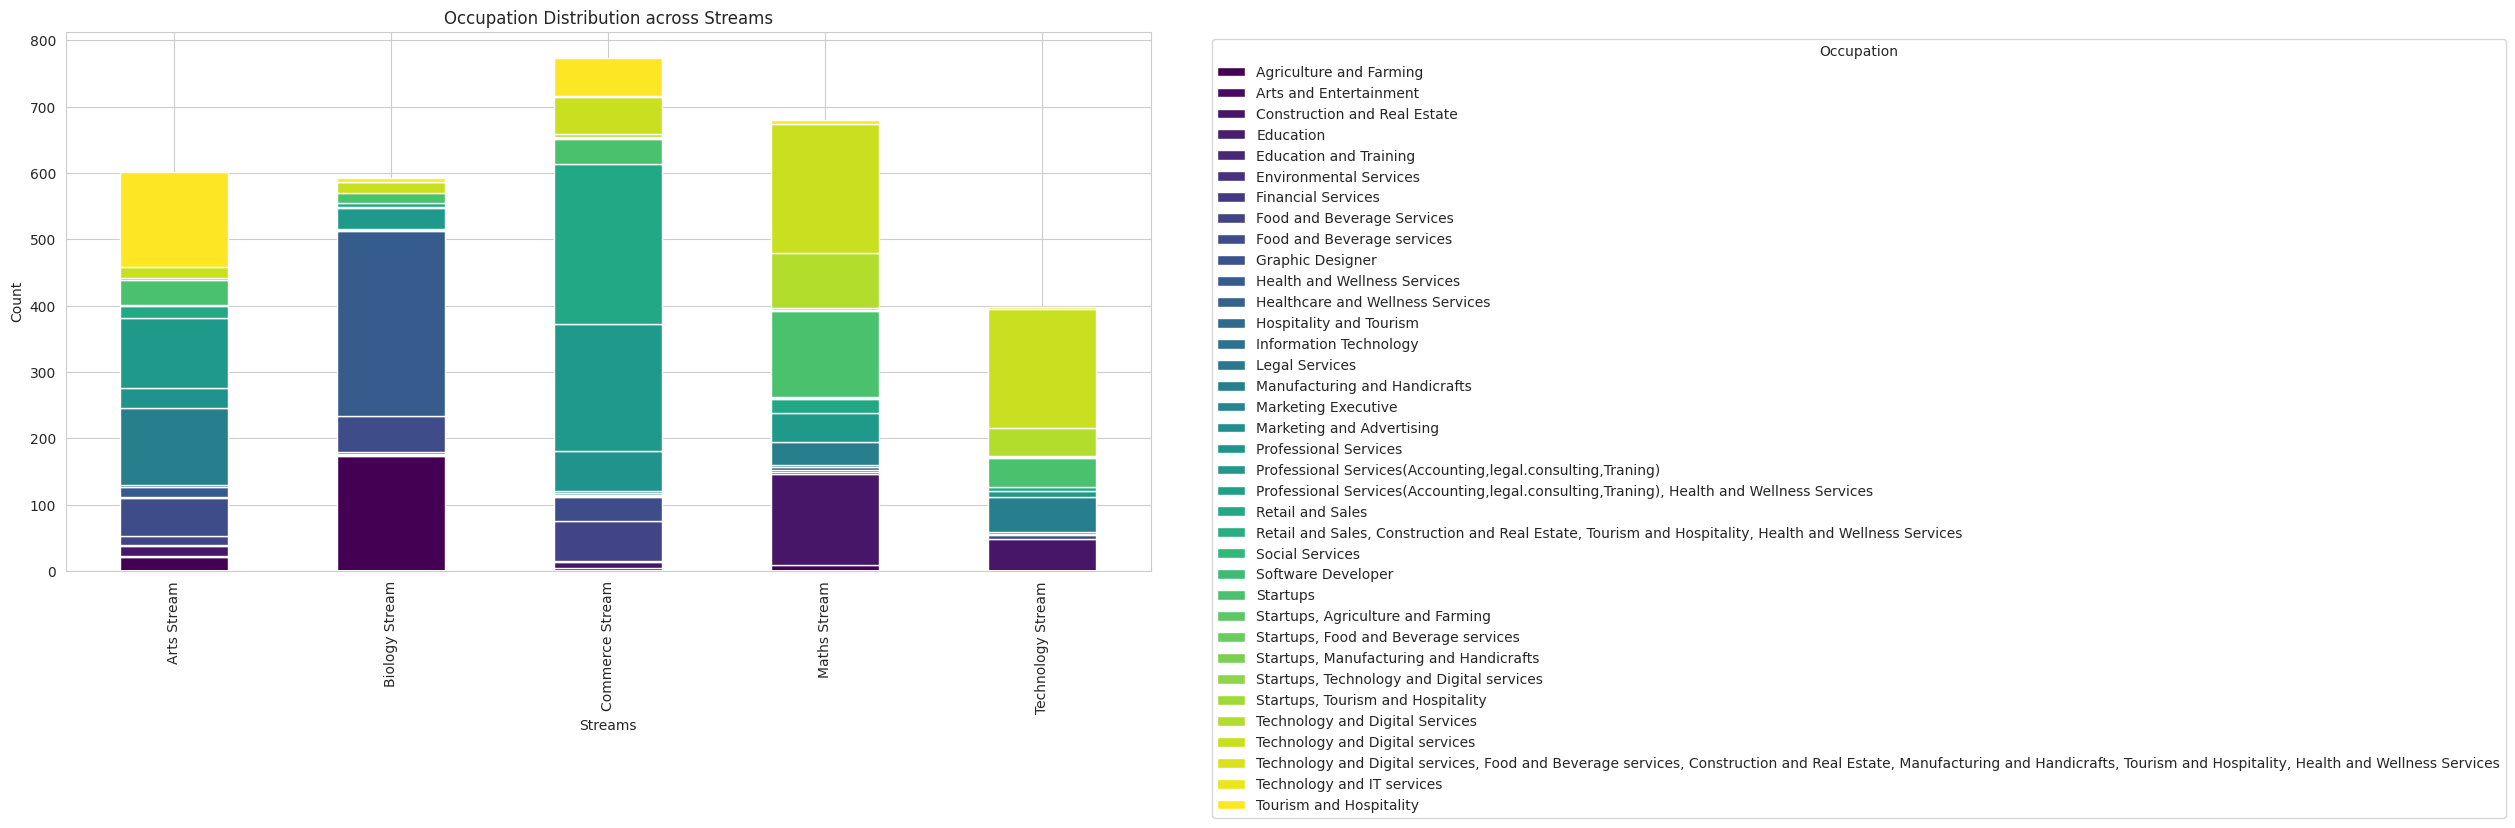

In [312]:
# Stacked Bar Plot for Occupation vs Streams
plt.figure(figsize=(14, 7))
occupation_streams = df.groupby(['Streams', 'Occupation']).size().unstack(fill_value=0)
occupation_streams.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('Occupation Distribution across Streams')
plt.xlabel('Streams')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Data preprocessing and feature engineering**

In [313]:
# Data preprocessing and feature engineering
# Encode categorical variables using OneHotEncoder
# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df.drop('Streams', axis=1)))
# Get feature names from the categories_ attribute of the encoder
feature_names = encoder.get_feature_names_out(df.drop('Streams', axis=1).columns)
df_encoded.columns = feature_names

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [314]:
# Add the target variable back to the encoded dataframe
df_encoded['Streams'] = df['Streams'].astype('category').cat.codes


# **Split data into features (X) and target (y)**

In [315]:
# Split data into features (X) and target (y)
X = df_encoded.drop('Streams', axis=1)
y = df_encoded['Streams']


# **Split data into training and testing sets**

In [316]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Hyperparameter tuning **

In [317]:
# Hyperparameter tuning using GridSearchCV
# Collaborative Filtering Model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [318]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_knn_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [319]:
# Evaluate the best model
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7508196721311475
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       132
           1       0.88      0.83      0.86       120
           2       0.77      0.77      0.77       166
           3       0.67      0.72      0.69       116
           4       0.63      0.70      0.66        76

    accuracy                           0.75       610
   macro avg       0.74      0.75      0.74       610
weighted avg       0.75      0.75      0.75       610



In [320]:
def predict_stream(skills, occupation):
    # Create a dataframe for the new input
    # new_data = pd.DataFrame({'Skills': [skills], 'Occupation': [occupation]})
    new_data = pd.DataFrame({
         'Career_Influence': ['No'],  # default value
          'Start_Time': ['Immediately'],  # default value
          'Motivations': ['Personal Growth and Development'],  # default value
          'Challenges': ['No'],  # default value
          'Skills': [skills],
          'Occupation': [occupation],
    })


    # OneHotEncode the new input
    new_data_encoded = pd.DataFrame(encoder.transform(new_data))
    new_data_encoded.columns = feature_names[:len(new_data_encoded.columns)]

    # Align the columns with the training data
    missing_cols = set(feature_names) - set(new_data_encoded.columns)
    for c in missing_cols:
        new_data_encoded[c] = 0
    new_data_encoded = new_data_encoded[feature_names]

    # Predict the stream using the best KNN model
    stream_code = best_knn_model.predict(new_data_encoded)[0]

    # Decode the stream code to the actual stream name
    stream_name = df['Streams'].astype('category').cat.categories[stream_code]

    return stream_name

In [321]:
skills_input = "Communication"
occupation_input = "Construction and Real Estate"
predicted_stream = predict_stream(skills_input, occupation_input)
print(f"Predicted Stream for skills '{skills_input}' and occupation '{occupation_input}': {predicted_stream}")

Predicted Stream for skills 'Communication' and occupation 'Construction and Real Estate': Maths Stream
